In [1]:
from NIX_Testing import NIX_Image_List, NIX_Image, doGridAnalysis
from pylab import *
from astropy.io import fits
from lmfit.models import GaussianModel

data_dir = '/home/ydallilar/Documents/NIX/nixDetBackup'

test_ids = ['FUN-040-01-1-a', 'FUN-040-01-1-b']
config = {'test_ids' : test_ids, 'data_dir' : data_dir}
NIX_GL = NIX_Image_List(config)

In [2]:
keywords = ['MJD-OBS', 'HIERARCH ESO DET READ CURNAME', 'HIERARCH ESO DET SEQ1 DIT']
tbl_fmt = '%15s,%35s,%20s,%20s%10s'

NIX_GL.printTable(keywords, tbl_fmt)

 NDX        TEST_ID,                           FILENAME,             MJD-OBS,    DET_READ_CURNAMEDET_SEQ1_DIT
0000 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0007.fits,       58707.7510148,    SLOW_UP_THE_RAMP       2.0
0001 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0008.fits,       58707.7513599,         SLOW_LR_CDS       2.0
0002 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0009.fits,       58707.7516898,      SLOW_LR_FOWLER       2.0
0003 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0010.fits,       58707.7520057,    SLOW_UP_THE_RAMP      10.0
0004 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0011.fits,       58707.7525607,         SLOW_LR_CDS      10.0
0005 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0012.fits,       58707.7530783,      SLOW_LR_FOWLER      10.0
0006 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0013.fits,       58707.7535787,    SLOW_UP_THE_RAMP      60.0
0007 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0014.fits,       58707.7554068,         SLOW_LR_CDS      60.0
0008 FUN-040-01-1-a,    ER

(-25, 25)

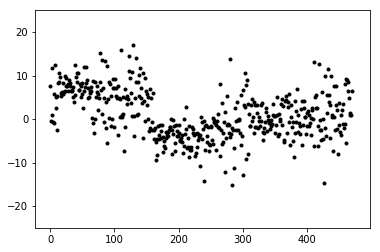

In [3]:
meds = NIX_GL.getMedian()
figure()
plot(meds, 'k.')
ylim([-25, 25])

In [4]:
NIX_GL.filter(slice(112, 162, 1))
res = NIX_GL.getPixelVariance()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 80
    # variables        = 3
    chi-square         = 2.1241e+10
    reduced chi-square = 2.7586e+08
    Akaike info crit   = 1557.77517
    Bayesian info crit = 1564.92125
[[Variables]]
    sigma:      1.47543352 +/- 0.02884159 (1.95%) (init = 1.25)
    center:     5.54872331 +/- 0.02884129 (0.52%) (init = 5.5)
    amplitude:  1943150.80 +/- 32895.5243 (1.69%) (init = 2000494)
    fwhm:       3.47438036 +/- 0.06791675 (1.95%) == '2.3548200*sigma'
    height:     525408.321 +/- 8894.57391 (1.69%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577


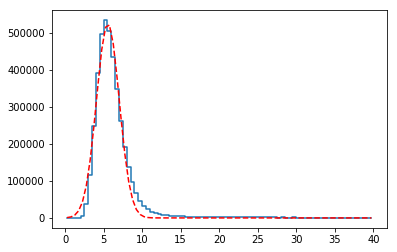

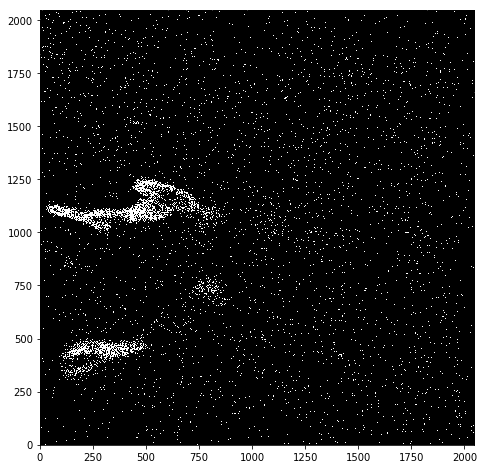

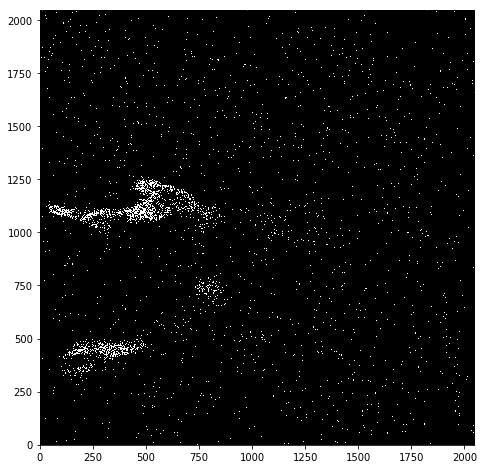

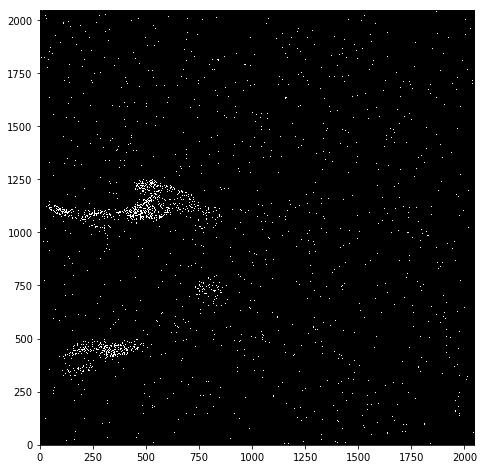

In [5]:
res1d = ravel(res)

figure()
hist, bins = histogram(res1d, 80, range=[0, 40])
bins = (bins[1:] + bins[:-1])/2.

model = GaussianModel()
pars = model.guess(hist, x=bins)
out = model.fit(hist, pars, x=bins)
print out.fit_report()

plot(bins, hist, drawstyle='steps-mid')
plot(bins, out.best_fit, 'r--')

lims = [20, 50, 100]

for i in range(len(lims)):
    figure(figsize=(8,8))
    out = zeros([2048, 2048])
    out[where(res > lims[i])] = 1
    imshow(out, cmap=cm.gray, origin='lower')

fits.PrimaryHDU(res).writeto('out/Dark_Variance_UTR_2secs.fits', overwrite=True)